# Assignment 6

### Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

In [75]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math as math
%matplotlib inline

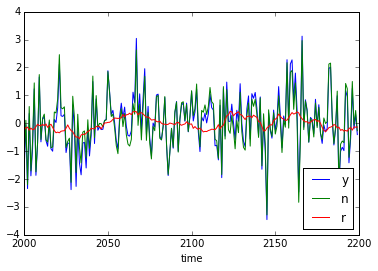

In [66]:
N = 10000
t = np.arange(0,N,1)

x = random.randn(N)
b = 20.
r = np.convolve(x,np.ones(b), 'same')/b
n = random.randn(r.shape[0])
y = r + n

plt.plot(t[2000:2200],y[2000:2200], label='y')
plt.plot(t[2000:2200],n[2000:2200], label='n')
plt.plot(t[2000:2200],r[2000:2200], label='r')
plt.xlabel('time')
plt.legend(loc=4)

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

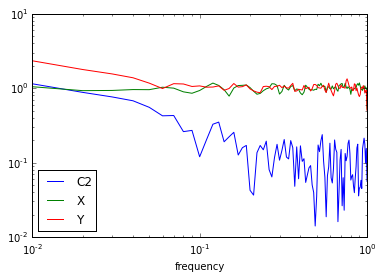

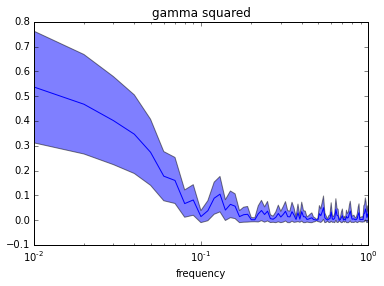

In [97]:
blocks = 50
blen = len(x)/blocks
C2 = mlab.csd(x, y, NFFT=blen, noverlap=blen/2)
X = mlab.psd(x, NFFT=blen, noverlap=blen/2)
Y = mlab.psd(y, NFFT=blen, noverlap=blen/2)
freq = C2[1]

spec = [[C2[0], 'C2'], [X[0], 'X'], [Y[0], 'Y']]
for ii, sp in enumerate(spec):
    plt.loglog(freq, abs(sp[0]), label=sp[1])
plt.legend(loc=3)
plt.xlabel('frequency')

gamma = (abs(C2[0])**2)/(X[0]*Y[0])
gamma2 = gamma
stdgamma = math.sqrt(2.)*gamma2*(1+gamma2)/(np.sqrt(abs(gamma))*math.sqrt(blocks))

plt.figure()
plt.plot(C2[1], gamma)
plt.fill_between(C2[1], gamma-1*stdgamma, gamma+stdgamma, alpha=0.5)
plt.title('gamma squared')
plt.xscale('log')
plt.xlabel('frequency')

The coherence starts off quite small (not even close to 1) and decrease to pretty well zero.

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

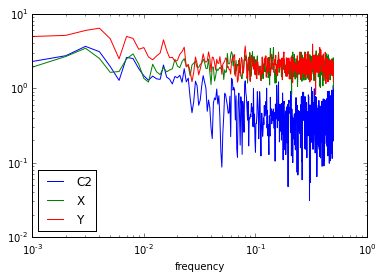

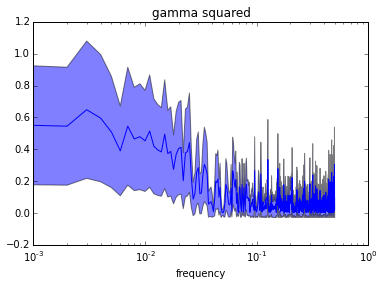

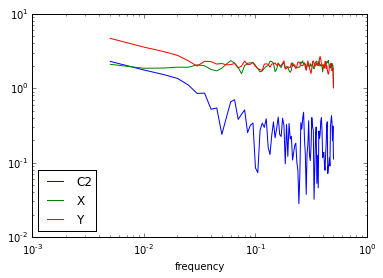

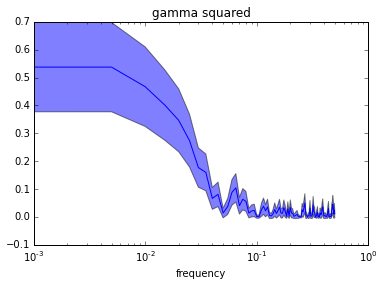

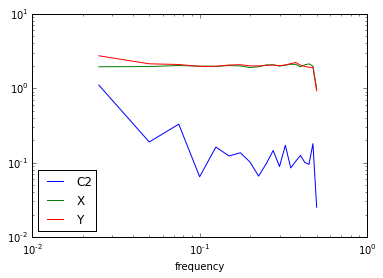

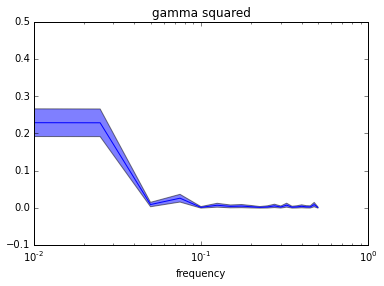

In [98]:
def g2(x, y, blocks, fs):
    blen = len(x)/blocks
    C2 = mlab.csd(x, y, Fs=fs, NFFT=blen, noverlap=blen/2)
    X = mlab.psd(x, Fs=fs, NFFT=blen, noverlap=blen/2)
    Y = mlab.psd(y, Fs=fs, NFFT=blen, noverlap=blen/2)
    freq = C2[1]
    
    plt.figure()
    spec = [[C2[0], 'C2'], [X[0], 'X'], [Y[0], 'Y']]
    for ii, sp in enumerate(spec):
        plt.loglog(freq, abs(sp[0]), label=sp[1])
    plt.legend(loc=3)
    plt.xlabel('frequency')

    gamma = (abs(C2[0])**2)/(X[0]*Y[0])
    gamma2 = gamma
    stdgamma = np.sqrt(2.)*gamma2*(1+gamma2)/(np.sqrt(abs(gamma))*np.sqrt(blocks*(2) - 1))
    plt.figure()
    plt.fill_between(C2[1], gamma-1*stdgamma, gamma+stdgamma, alpha=0.5)
    plt.plot(C2[1], gamma)
    plt.title('gamma squared')
    plt.xscale('log')
    plt.xlabel('frequency')

blocks = [10, 50, 250]

for ii, bb in enumerate(blocks):
    g2(x, y, bb, 1)

As the number of blocks in increases we see the coherence drop. we also see a cleaner coherence as the average of many smaller intervals are taken. The overall trend remains from a high coherence dropping down to a lower plateau just about 0.05 frequency units.

## Q2: Shear turbulence data

In [6]:
time=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')


<div style='background:#F0F0F0'>Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.

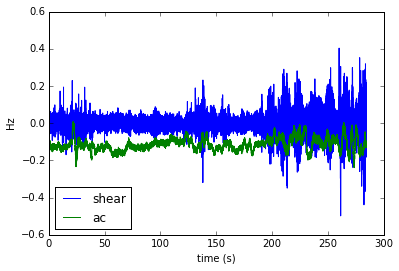

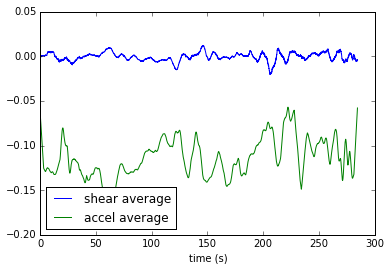

In [102]:
plt.plot(time, shear, label='shear')
plt.plot(time, ac, label='ac')
plt.xlabel('time (s)')
plt.ylabel('Hz')
plt.legend(loc=3)

b = 1000.
shav = np.convolve(shear,np.ones(b), 'same')/b
acav = np.convolve(ac,np.ones(b), 'same')/b
plt.figure()
plt.plot(time, shav, label='shear average')
plt.plot(time, acav, label='accel average')
plt.legend(loc=3)
plt.xlabel('time (s)')

The times series both look pretty stationary overall. There are no distinct trends in either series. Plotting a running average of the series shows that the mean does depend on time though. So this process is not stationary.

<div style='background:#F0F0F0'> **2** Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling).  Comment on the spectral similarities and the coherence.  

(44434L,)
[  6.40000000e-03   1.28000000e-02   1.92000000e-02 ...,   2.84364800e+02
   2.84371200e+02   2.84377600e+02]


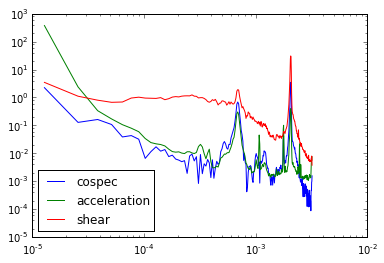

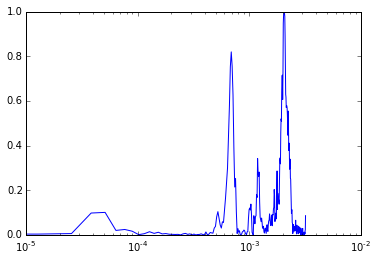

In [42]:
print ac.shape
print time
dt = np.median(np.diff(time))
blocks = 500

Gsa, freq = mlab.csd(shear, ac, Fs=dt, NFFT=blocks, noverlap=blocks/2)
Gss, freq = mlab.psd(shear, Fs=dt, NFFT=blocks, noverlap=blocks/2)
Gaa, freq = mlab.psd(ac, Fs=dt, NFFT=blocks, noverlap=blocks/2)

Gsa = abs(Gsa)
Gss = abs(Gss)
Gaa = abs(Gaa)

gamma =  Gsa**2/(Gss*Gaa)

plt.figure()
plt.loglog(freq, Gsa, label='cospec')
plt.loglog(freq, Gaa, label='acceleration')
plt.loglog(freq, Gss, label='shear')
plt.legend(loc=3)

plt.figure()
plt.plot(freq, gamma, label='gamma')
plt.xscale('log')

The 2 series spectral density share peaks at 0.002Hz and 0.0007Hz. The biggest difference being the shear carries more energy in the lower frequencies compared to the acceleration. The coherence plot clearly shows this aswell.

<div style='background:#F0F0F0'> **3** Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

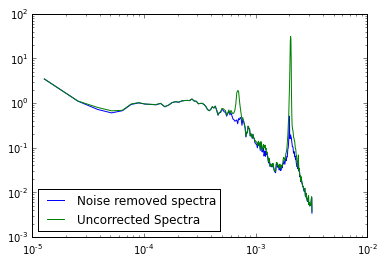

In [49]:
Gssnn = Gss - (Gsa)**2/Gaa

plt.loglog(freq, Gssnn, label='Noise removed spectra')
plt.loglog(freq, Gss, label='Uncorrected Spectra')
plt.legend(loc=3)

Correcting for noise removed one peak out of the shear spectra completely, where the another peak shear frequency was reduced significantly but still distinguishable.

To correct for the noise, first the cospectra was computed to see how related each frequency is for the shear and the acceleration. This was then normalized by the amount of power in the accelartion (noise).
This term was then subtracted from the the power spectum of the of the shear.

<div style='background:#F0F0F0'>**4** Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra.  Comment on the differences and the effect of the correction on each spectral estimate.    

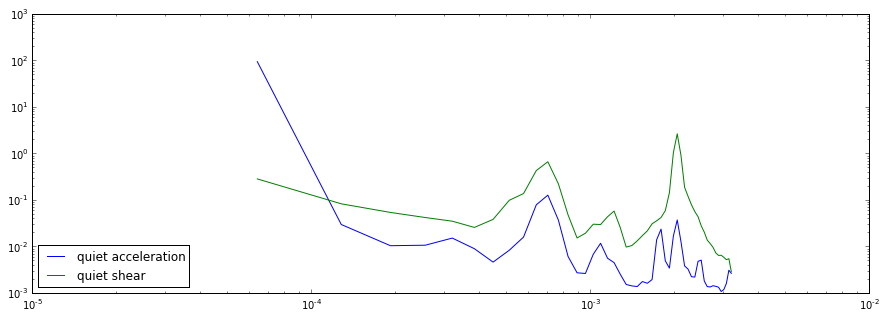

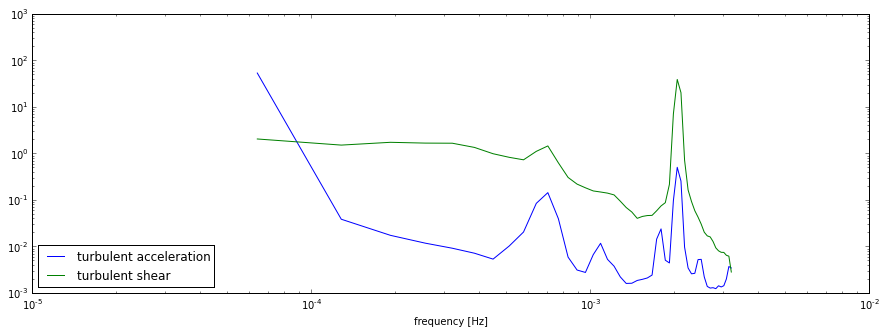

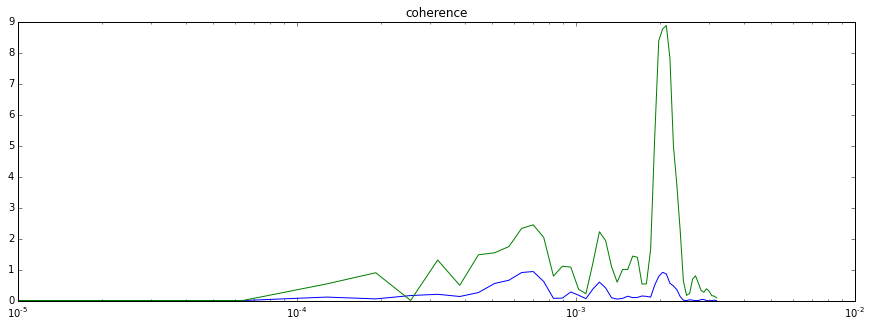

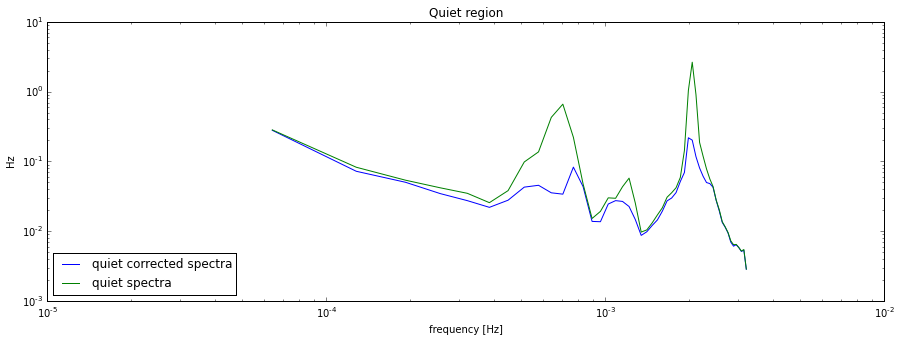

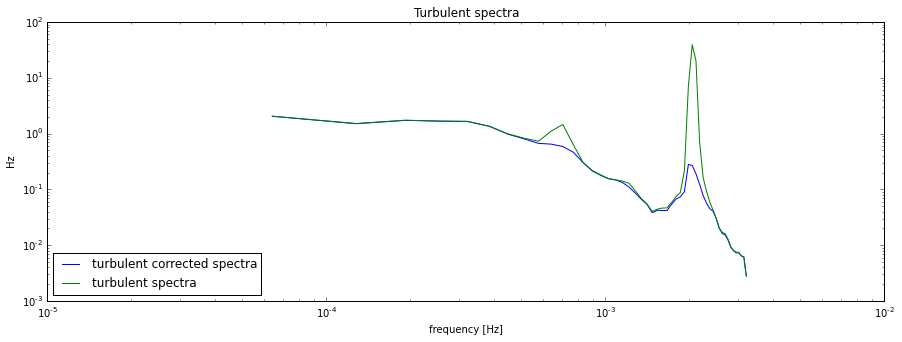

In [73]:
qshear = shear[7812: 2*7812]
qac = ac[7812: 2*7812]
tshear = shear[7812*4: 7812*5]
tac = ac[7812*4: 7812*5]

blocks=100

Gsaq, freq = mlab.csd(qshear, qac, Fs=dt, NFFT=blocks, noverlap=blocks/2)
Gssq, freq = mlab.psd(qshear, Fs=dt, NFFT=blocks, noverlap=blocks/2)
Gaaq, freq = mlab.psd(qac, Fs=dt, NFFT=blocks, noverlap=blocks/2)

Gsat, freq = mlab.csd(tshear, tac, Fs=dt, NFFT=blocks, noverlap=blocks/2)
Gsst, freq = mlab.psd(tshear, Fs=dt, NFFT=blocks, noverlap=blocks/2)
Gaat, freq = mlab.psd(tac, Fs=dt, NFFT=blocks, noverlap=blocks/2)

Gsaq = abs(Gsaq)
Gssq = abs(Gssq)
Gaaq = abs(Gaaq)

Gsat = abs(Gsat)
Gsst = abs(Gsst)
Gaat = abs(Gaat)

gammaq = Gsaq**2/(Gssq*Gaaq)
gammat = Gsat**2/(Gsat*Gaat)

plt.figure(figsize=(15,5))
plt.title('coherence')
plt.plot(freq, gammaq, label='gamma')
plt.plot(freq, gammat, label='gamma')
plt.xscale('log')

Gssnnq = Gssq - (Gsaq)**2/Gaaq
Gssnnt = Gsst - (Gsat)**2/Gaat

plt.figure(figsize=(15,5))
plt.title('Quiet region')
plt.loglog(freq, Gssnnq, label='quiet corrected spectra')
plt.loglog(freq, Gssq, label='quiet spectra')
plt.xlabel('frequency [Hz]')
plt.ylabel('Hz')
plt.legend(loc=3)

plt.figure(figsize=(15,5))
plt.title('Turbulent spectra')
plt.loglog(freq, Gssnnt, label='turbulent corrected spectra')
plt.loglog(freq, Gsst, label='turbulent spectra')
plt.xlabel('frequency [Hz]')
plt.ylabel('Hz')
plt.legend(loc=3)


The noise plays a larger role in that of the quiet region, which is to be expected, Since when the shear becomes large, the desired signal dominates, and the noise plays less of a role. We do observe in both plots the acceleration makes up atleast part of the noise, and is corrected for in both plots. The acceleration contributes a significant amount of energy at frequencies of 0.0007 Hz and 0.005Hz, which is most significant in the quiet times.